In [2]:
import numpy as np
import pandas as pd

#mainfile = pd.read_csv('D:\\순천향병원\\참조 분석 코드\\Package\\## 최종 20200512 오비이랩에 보낼 최종 데이타.xlsx',\
#                       na_filter=False, skip_blank_lines=False, na_values=[''], )
mainfile = pd.read_csv('D:\\순천향병원\\참조 분석 코드\\Package\\main.csv',\
                       na_filter=False, skip_blank_lines=False, na_values=['',' '] ).set_index('No').fillna(np.nan)
test = pd.read_csv('D:\\순천향병원\\참조 분석 코드\\Package\\features_test.csv')
cont = pd.read_csv('D:\\순천향병원\\참조 분석 코드\\Package\\features_control.csv')
test = test.rename(columns={'Unnamed: 0':'No'}).set_index('No')
cont = cont.rename(columns={'Unnamed: 0':'No'})
mainfile = mainfile.join(cont, on='No', how='left').loc[:'N-174',:]
mainfile.dropna(thresh=5, axis=0)
test2 = test.loc[~test.index.duplicated(keep='first')]
mainfile.update(test2)
#mainfile.to_csv('D:\\순천향병원\\참조 분석 코드\\Package\\features_combined.csv',encoding='utf-8-sig')

FileNotFoundError: [Errno 2] File D:\순천향병원\참조 분석 코드\Package\features_test.csv does not exist: 'D:\\순천향병원\\참조 분석 코드\\Package\\features_test.csv'

In [18]:
mainfile = pd.read_csv('D:\\순천향병원\\참조 분석 코드\\Package\\features_4.csv').set_index('No')
mainfile['conn_den_diff'] = mainfile['conn_den'] - mainfile['conn_den_CB']
#mainfile['auc_diff'] = mainfile['auc_CB'] - mainfile['auc']
sample = mainfile.loc[mainfile['Diagnosis'].isin(['Normal','insomnias',\
                                    'Observation for other suspected diseases and conditions']) ]
notsample = mainfile.loc[[i for i in mainfile.index.tolist() if i not in sample.index.tolist()]]

In [4]:
mainfile.columns

Index(['Date', 'Hospital_\nNo', 'Name', 'Diagnosis', 'Dz_RE', 'Dz_G', 'Birth',
       'Sex', 'Age', 'No.ㄱ', 'No.ㅅ', 'No.ㅇ', '뇌파_검사_여부', '설문지_날짜', '비고',
       '거주지역', '학력', '직업', 'ARSR_ver_1.1', '_', '_.U', '_.V', '_.W', '_.X',
       '_.Y', 'K_AADHDS', 'IN', 'IN_개수_', 'HA', 'HA_개수_', 'PHQ_9',
       'State_Anxiety_\nin_STAI', 'Trait_Anxiety_\nin_STAI', 'GARS_scale',
       'BAI', 'BDI_II', 'SSI_BECK', '스마트폰_\n과의존_척도', 'AUDIT_K', 'conn_den_CB',
       'auc_CB', 'slope_CB', 'mean_CB', 'std_CB', 'slope_int_CB',
       'mean_int_CB', 'conn_den_diff', 'auc_diff', 'conn_den', 'auc', 'slope',
       'mean', 'std', 'slope_int', 'mean_int', 'slope_0', 'mean_0', 'std_0',
       'slope_int_0', 'mean_int_0', 'slope_1', 'mean_1', 'std_1',
       'slope_int_1', 'mean_int_1', 'slope_2', 'mean_2', 'std_2',
       'slope_int_2', 'mean_int_2', 'slope_3', 'mean_3', 'std_3',
       'slope_int_3', 'mean_int_3', 'slope_4', 'mean_4', 'std_4',
       'slope_int_4', 'mean_int_4', 'slope_5', 'mean_5', 'std_5',

In [5]:
pd.set_option('display.max_columns', None)
mainfile.groupby('Dz_G').mean()

,Sex,Age,No.ㄱ,No.ㅅ,No.ㅇ,거주지역,학력,직업,ARSR_ver_1.1,_,_.U,_.V,_.W,_.X,_.Y,K_AADHDS,IN,IN_개수_,HA,HA_개수_,PHQ_9,State_Anxiety_\nin_STAI,Trait_Anxiety_\nin_STAI,GARS_scale,BAI,BDI_II,SSI_BECK,스마트폰_\n과의존_척도,AUDIT_K,conn_den_CB,auc_CB,slope_CB,mean_CB,std_CB,slope_int_CB,mean_int_CB,conn_den_diff,auc_diff,conn_den,auc,slope,mean,std,slope_int,mean_int,slope_0,mean_0,std_0,slope_int_0,mean_int_0,slope_1,mean_1,std_1,slope_int_1,mean_int_1,slope_2,mean_2,std_2,slope_int_2,mean_int_2,slope_3,mean_3,std_3,slope_int_3,mean_int_3,slope_4,mean_4,std_4,slope_int_4,mean_int_4,slope_5,mean_5,std_5,slope_int_5,mean_int_5,slope_6,mean_6,std_6,slope_int_6,mean_int_6,slope_7,mean_7,std_7,slope_int_7,mean_int_7
Dz_G,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.619048,30.714286,8.000000,7.714286,6.166667,3.750000,2.025000,0.900000,5.575000,0.750000,0.67500,0.750000,1.675000,1.475000,0.22500,23.025000,12.000000,0.200000,11.025,0.125000,2.925000,37.100000,35.100000,18.750000,5.275000,5.65000,1.400000,15.800000,7.675000,0.600877,-0.055800,-1.247974e-06,-0.000214,0.000309,-0.000002,-0.000145,-0.020843,-0.515169,0.621720,0.459369,9.695205e-07,0.00091,0.000641,0.000010,0.000500,8.103821e-07,0.000706,0.000676,0.000007,0.000371,0.000002,0.001172,0.000974,0.000010,0.000386,6.796538e-07,0.000862,0.000722,0.000010,0.000504,8.821744e-07,0.001043,0.000721,0.000012,0.000652,1.174077e-06,0.000860,0.000659,0.000009,0.000430,0.000003,0.001422,0.000975,0.000012,0.000530,6.779897e-07,0.000839,0.000683,0.00001,0.000484,8.629923e-07,0.000996,0.000644,0.000012,0.000615
2,1.652632,37.094737,5.031579,5.021053,4.578947,3.012821,2.948718,0.641026,11.512821,1.820513,1.74359,1.807692,2.564103,2.333333,1.24359,35.397436,18.923077,2.769231,16.000,1.846154,15.076923,60.064103,58.397436,37.525641,28.602564,30.25641,13.397436,18.384615,8.397436,0.562346,-0.035874,-7.820267e-07,-0.000138,0.000285,-0.000001,-0.000105,-0.050703,-0.409111,0.613048,0.373237,7.682484e-07,0.00074,0.000592,0.000008,0.000378,7.630453e-07,0.000618,0.000600,0.000007,0.000298,0.000002,0.000995,0.000836,0.000009,0.000377,6.233840e-07,0.000778,0.000640,0.000009,0.000445,9.256324e-07,0.000787,0.000626,0.000009,0.000413,3.171560e-07,0.000535,0.000604,0.000006,0.000288,0.000001,0.000789,0.000723,0.000007,0.000281,6.975600e-07,0.000838,0.000728,0.00001,0.000438,9.061667e-07,0.000763,0.000617,0.000008,0.000404


In [178]:
mainfile['Diagnosis'].value_counts()

Normal                                                                         38
insomnias                                                                      35
Observation for other suspected diseases and conditions                        11
Other bipolar affective disorders                                               7
Moderate depressive episode                                                     5
Alcohol abuse                                                                   4
Generalized anxiety disorder                                                    3
Dysthymia                                                                       3
Mild depressive episode                                                         3
Attention deficit hyperactivity disorder                                        2
Atypical depression                                                             2
Bipolar II disorder                                                             2
Bipolar affectiv

In [179]:
mainfile.auc.max()

2.0527769571492973

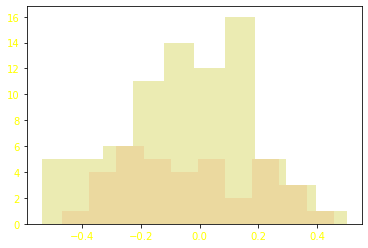

In [11]:
control = mainfile[ mainfile['Diagnosis'] == 'Normal']['conn_den_diff']
test = mainfile[ mainfile['Diagnosis'] != 'Normal']['conn_den_diff']
plt.hist(control,color='r', alpha=0.1)
plt.hist(test, color='y', alpha=0.3)

plt.tick_params(labelcolor = 'yellow')
plt.show()

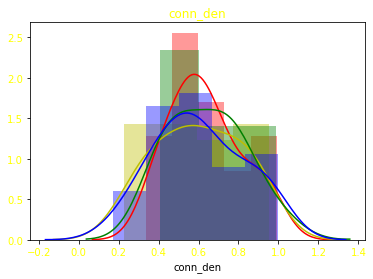

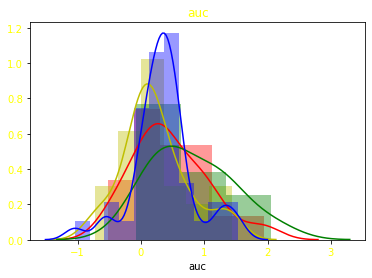

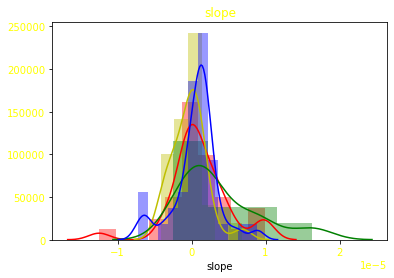

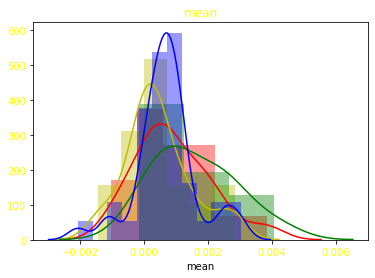

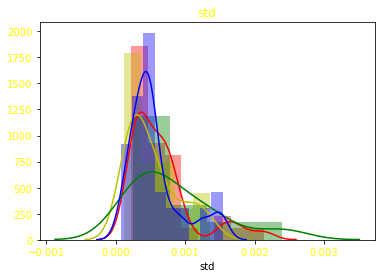

c:\users\lcm\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12593 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lcm\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12593 missing from current font.
  font.set_text(s, 0, flags=flags)


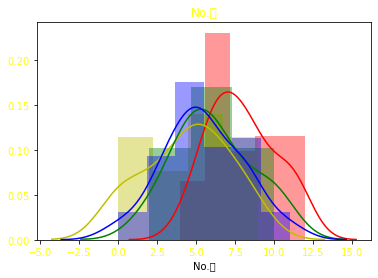

c:\users\lcm\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lcm\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12613 missing from current font.
  font.set_text(s, 0, flags=flags)


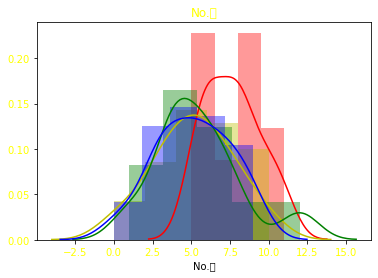

c:\users\lcm\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lcm\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12615 missing from current font.
  font.set_text(s, 0, flags=flags)


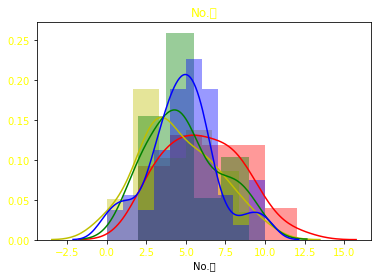

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
#for i in ['auc_diff','conn_den_CB','auc_CB', 'slope_CB', 'mean_CB', 'std_CB', 'slope_int_CB','mean_int_CB']:
for i in ['conn_den', 'auc', 'slope', 'mean', 'std', 'No.ㄱ', 'No.ㅅ', 'No.ㅇ']:    
    control = mainfile[ mainfile['Diagnosis'] == 'Normal'][i]
    test = mainfile[ mainfile['Diagnosis'] == 'insomnias'][i]
    test1 = mainfile.loc[ mainfile['Diagnosis'].isin(['Observation for other suspected diseases and conditions'])][i]
    #test2 = mainfile[ mainfile['Diagnosis'] == 'Other bipolar affective disorders'][i]
    test3 = notsample[i]
    sns.distplot(control,color='r')
    sns.distplot(test, color='y')
    sns.distplot(test1, color='g')
    sns.distplot(test3, color='b')
#     plt.hist(control,color='r', alpha=0.1)
#     plt.hist(test, color='y', alpha=0.3)
#     plt.hist(test1, color='g', alpha=0.3)
    #plt.hist(test2, color='b', alpha=0.3)
#     plt.hist(test3, color='black', alpha=0.1)
    plt.title(i, color='yellow')
    plt.tick_params(labelcolor = 'yellow')
    plt.show()

In [20]:
mainfile['Diagnosis'].unique()

array(['MDD', 'Other bipolar affective disorders', 'insomnias',
       'Observation for other suspected diseases and conditions',
       'Panic disorder', 'Mild depressive episode', 'Alcohol abuse',
       'Bulimia nervosa', 'Normal',
       'Pituitary adenoma\nBipolar affective disorder, unspecified',
       'Bipolar II disorder', 'Dysthymia',
       'Major depression, recurrent without psychotic symptoms',
       'Atypical depression', 'Generalized anxiety disorder',
       'Moderate depressive episode', 'ADHD',
       'Major depression, \nrecurrent without psychotic symptoms',
       'Bipolar affective disorder, \nnow depressed',
       'Bipolar affective disorder, currently\n in remission',
       'Severe depressive episode\n without psychotic symptoms',
       'Panic attack', 'Somatoform disorder', 'Homosexuality\ninsomnias',
       'Morbid obesity\nModerate depressive episode',
       'Dependent personality disorder', '고도비만수술 협진',
       'Severe depressive episode without psychot

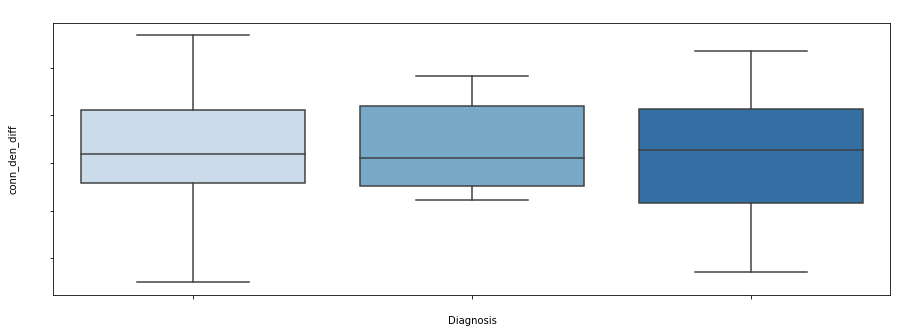

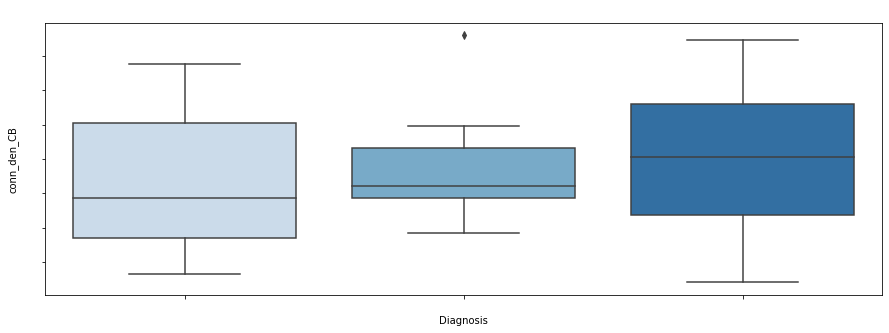

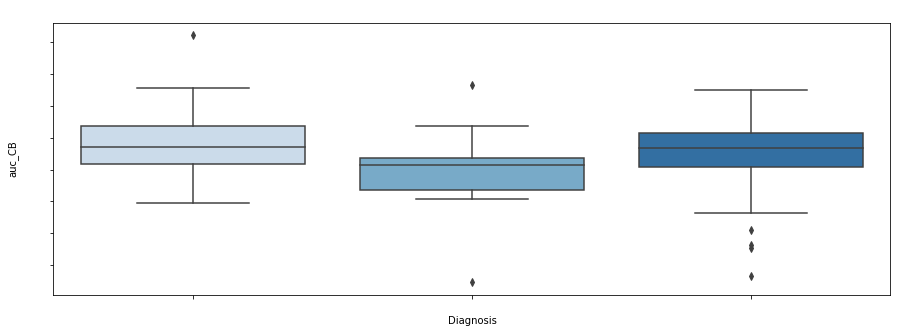

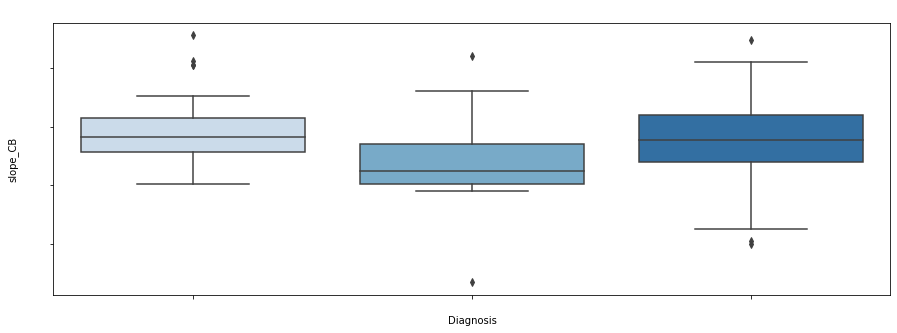

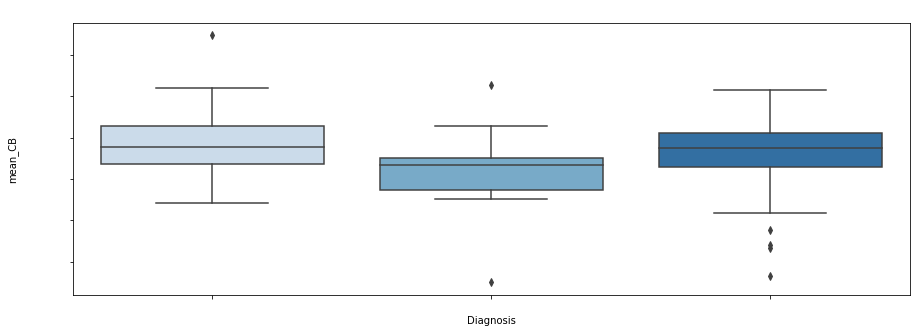

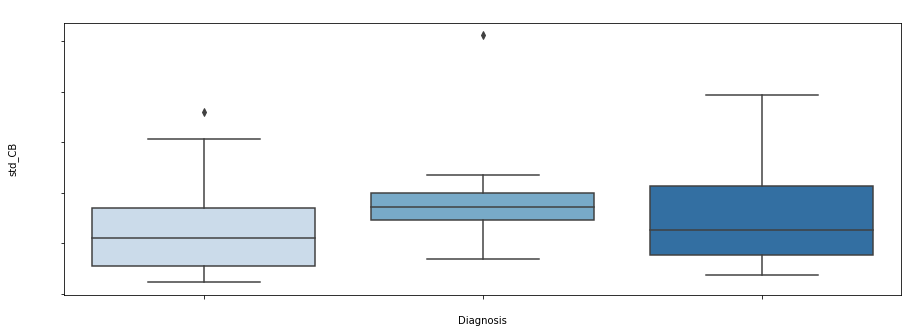

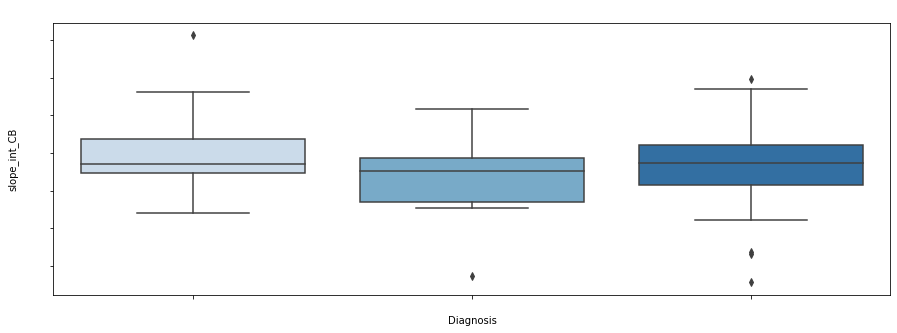

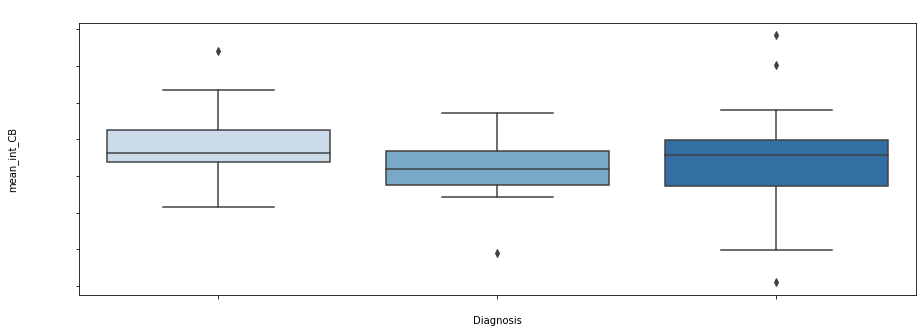

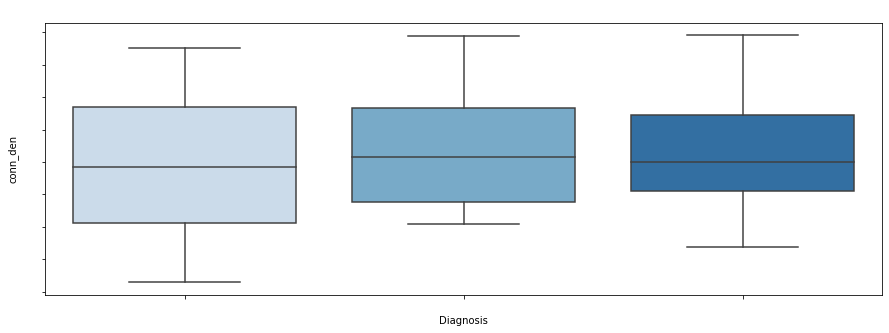

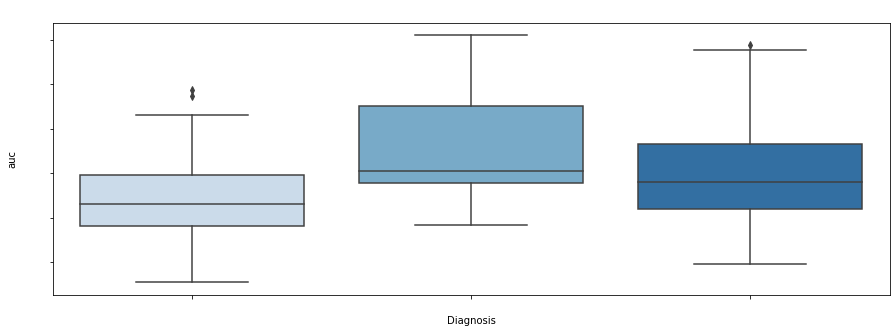

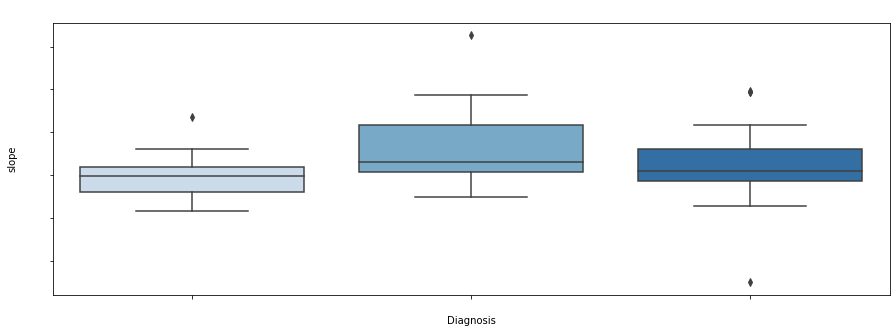

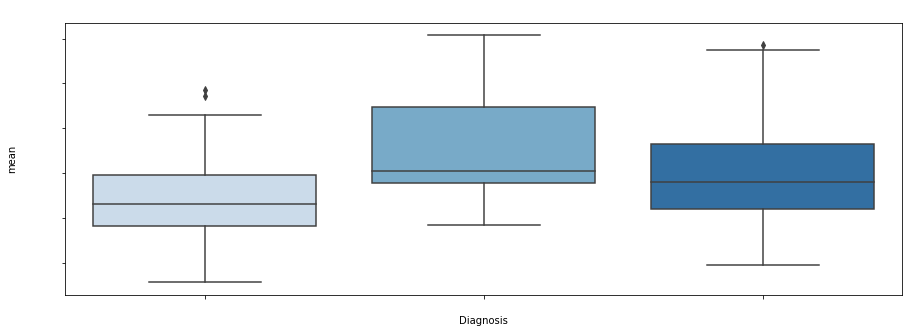

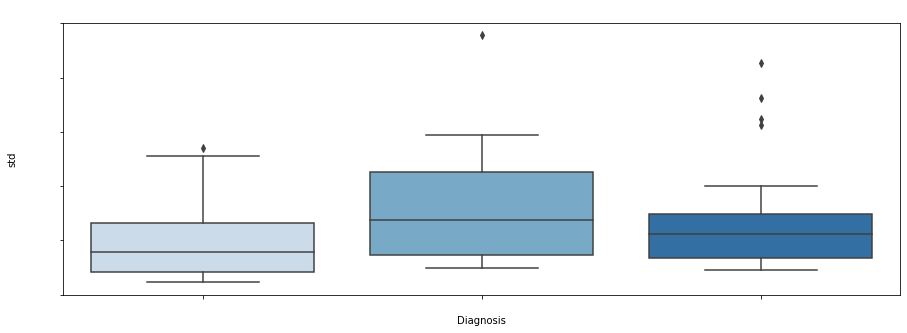

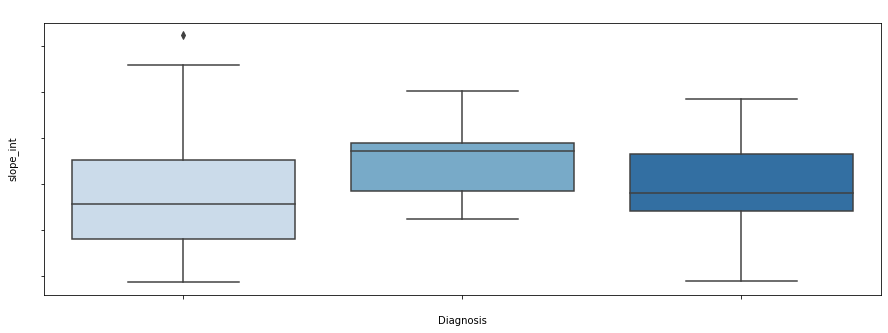

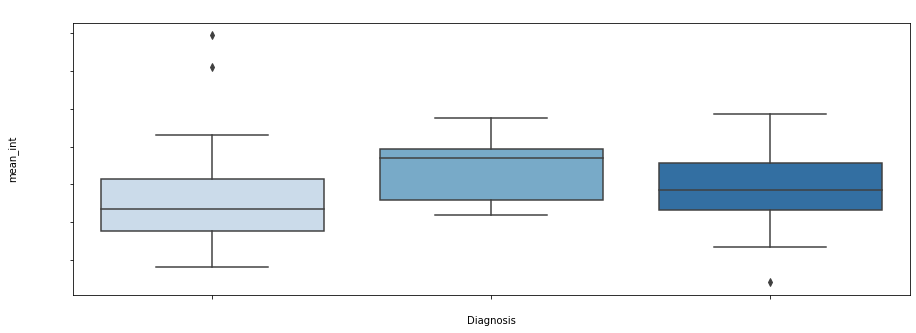

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in ['conn_den_diff','conn_den_CB','auc_CB', 'slope_CB', 'mean_CB', 'std_CB', 'slope_int_CB',\
          'mean_int_CB','conn_den', 'auc','slope', 'mean', 'std', 'slope_int', 'mean_int' ]:
    #mainfile[mainfile['Dz_G'].astype(int) == 1][i]
    plt.figure(figsize=(15,5))
    sns.boxplot(x=sample['Diagnosis'], y=sample[i], data=sample, palette='Blues')
    plt.tick_params(labelcolor = 'white')
    plt.title(i, color='white')
    plt.show()


c:\users\lcm\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\lcm\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


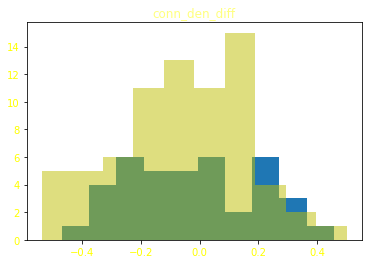

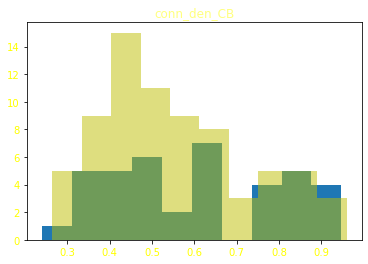

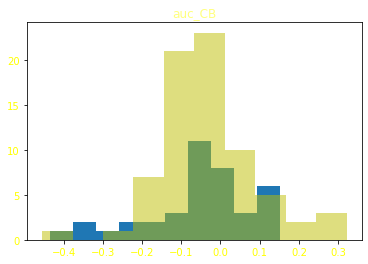

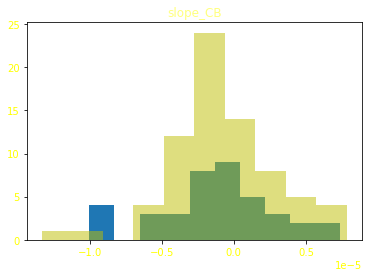

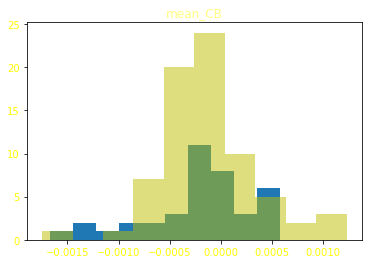

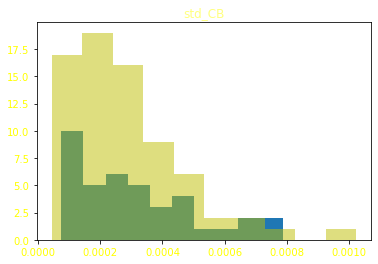

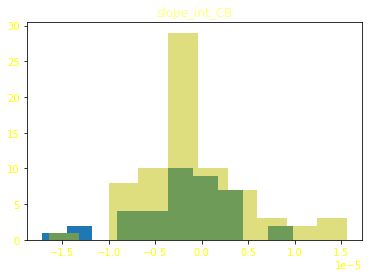

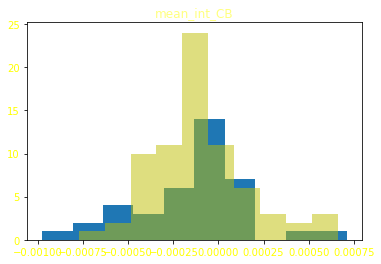

In [183]:
for i in ['conn_den_diff','conn_den_CB','auc_CB', 'slope_CB', 'mean_CB', 'std_CB', 'slope_int_CB','mean_int_CB']:
    control = mainfile[ mainfile['Dz_G'].astype(int) == 1][i]
    test = mainfile[ mainfile['Dz_G'].astype(int) == 2][i]
    plt.hist(control)
    plt.hist(test, color='y', alpha=0.5)
    plt.title(i, color='yellow',alpha=0.5)
    plt.tick_params(labelcolor = 'yellow')
    plt.show()

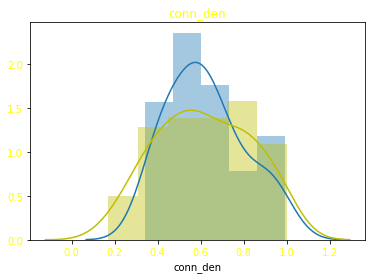

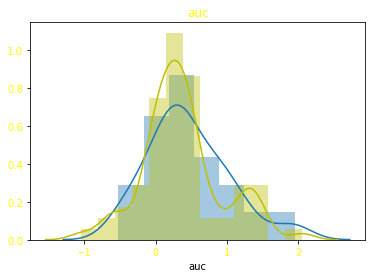

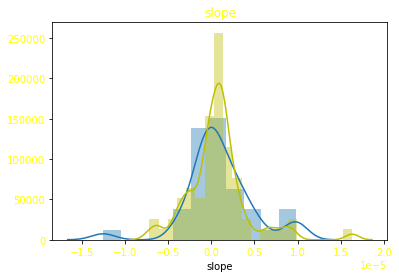

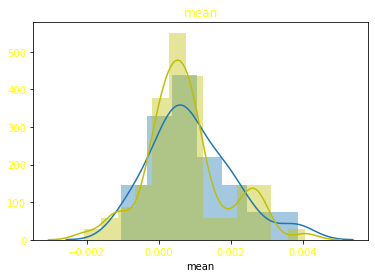

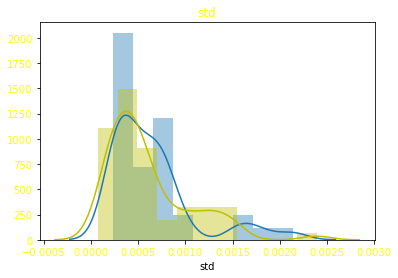

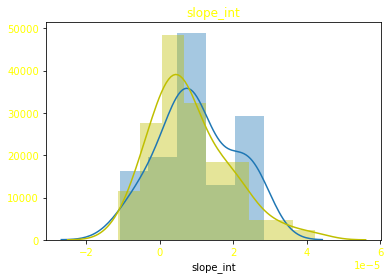

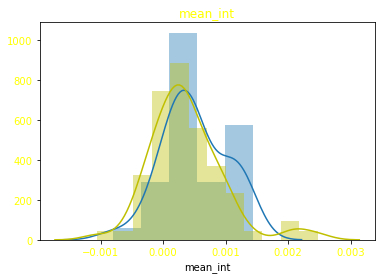

In [184]:
minx = np.min(mainfile['conn_den'])
maxx = np.max(mainfile['conn_den'])
#plt.hist(mainfile['conn_den'], bins=np.arange( minx, maxx+0.003, 0.003))
#sns.distplot(mainfile['conn_den'])
for i in ['conn_den','auc', 'slope', 'mean', 'std', 'slope_int', 'mean_int']:
    control = mainfile[ mainfile['Dz_G'].astype(int) == 1][i]
    test = mainfile[ mainfile['Dz_G'].astype(int) == 2][i]
    sns.distplot(control)
    sns.distplot(test, color='y')
    plt.title(i, color='yellow')
    plt.tick_params(labelcolor = 'yellow')
    plt.show()

c:\users\lcm\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\lcm\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


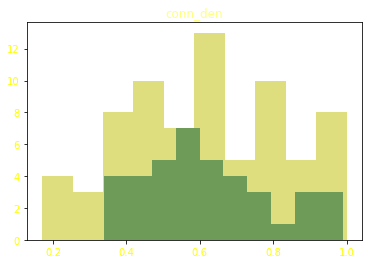

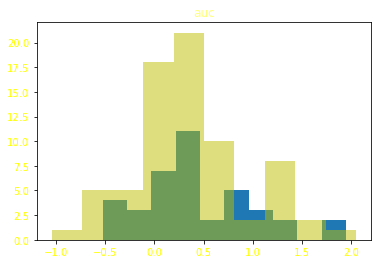

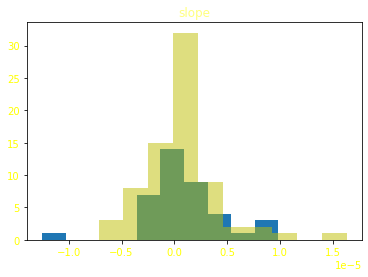

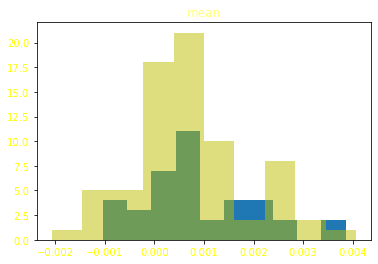

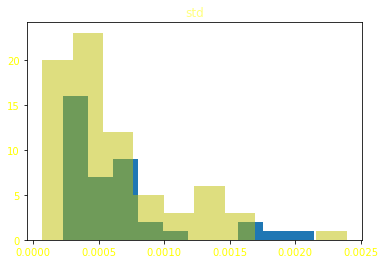

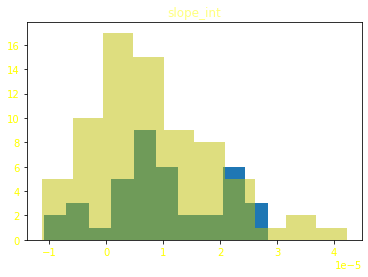

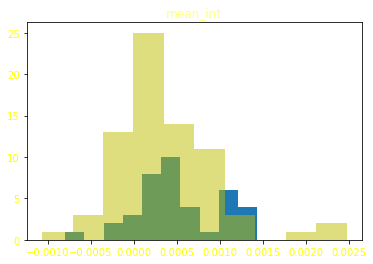

In [185]:
for i in ['conn_den','auc', 'slope', 'mean', 'std', 'slope_int', 'mean_int']:
    control = mainfile[ mainfile['Dz_G'].astype(int) == 1][i]
    test = mainfile[ mainfile['Dz_G'].astype(int) == 2][i]
    plt.hist(control)
    plt.hist(test, color='y', alpha=0.5)
    plt.title(i, color='yellow',alpha=0.5)
    plt.tick_params(labelcolor = 'yellow')
    plt.show()

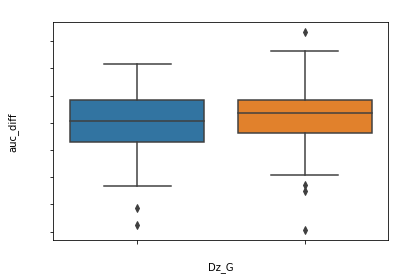

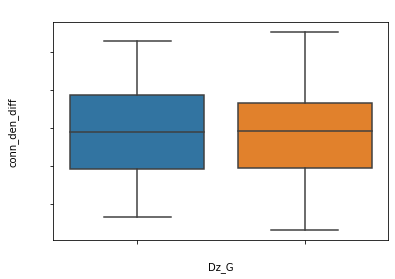

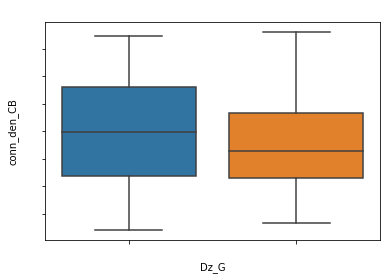

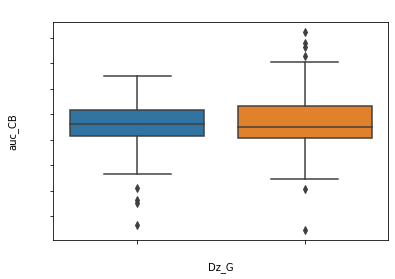

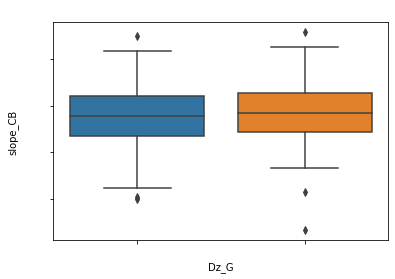

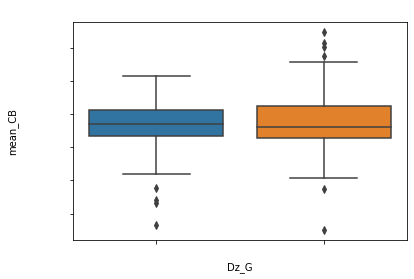

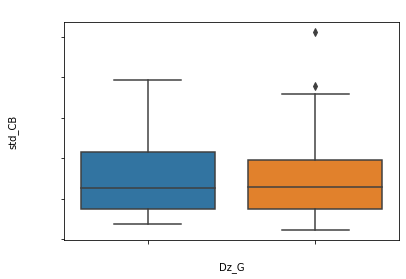

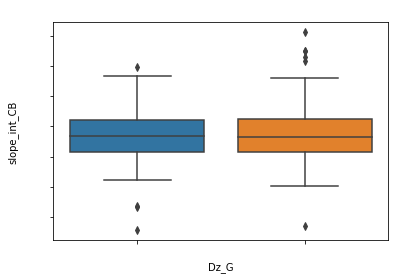

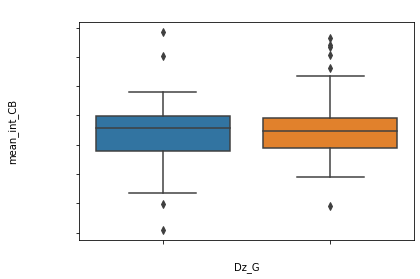

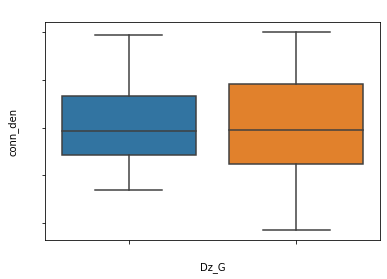

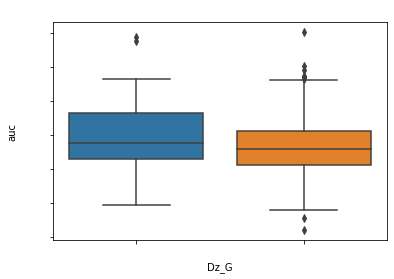

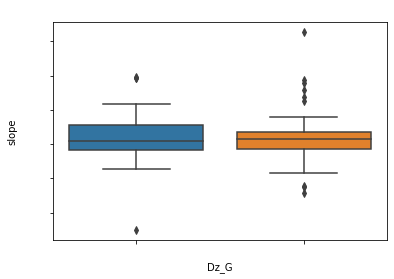

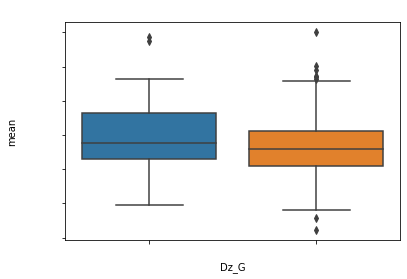

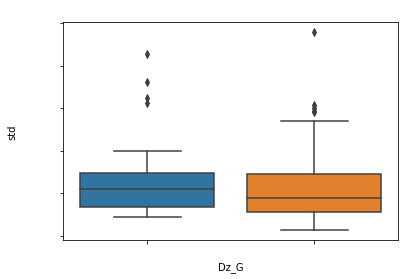

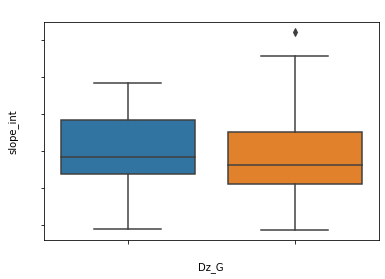

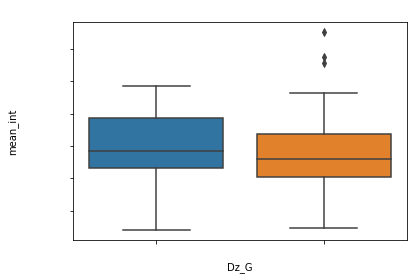

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in ['auc_diff', 'conn_den_diff','conn_den_CB','auc_CB', 'slope_CB', 'mean_CB', 'std_CB', 'slope_int_CB',\
          'mean_int_CB','conn_den', 'auc','slope', 'mean', 'std', 'slope_int', 'mean_int' ]:
    #mainfile[mainfile['Dz_G'].astype(int) == 1][i]
    sns.boxplot(x=mainfile['Dz_G'].astype(int), y=mainfile[i], data=mainfile)
    plt.tick_params(labelcolor = 'white')
    plt.title(i, color='white')
    plt.show()

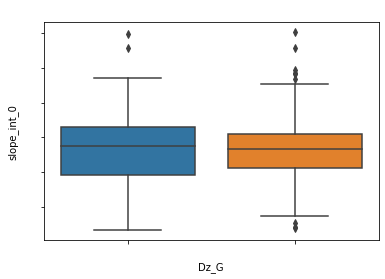

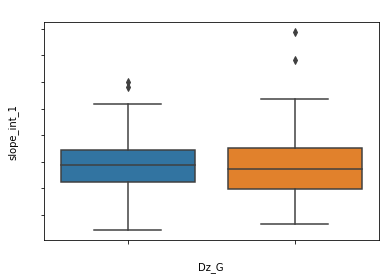

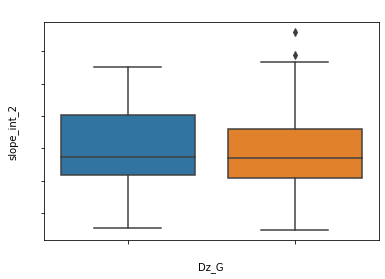

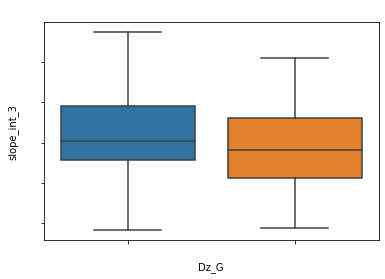

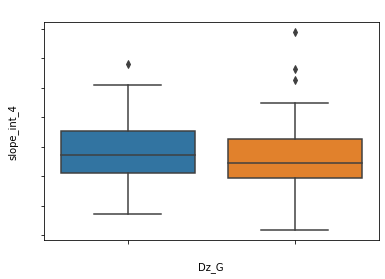

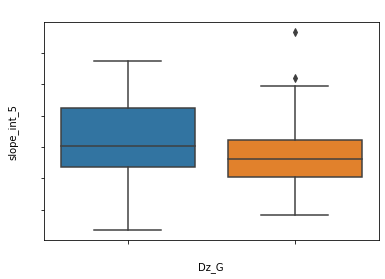

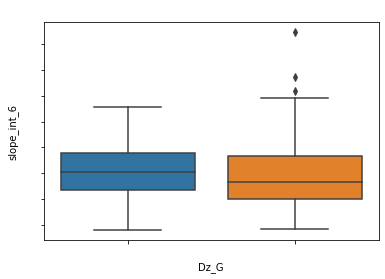

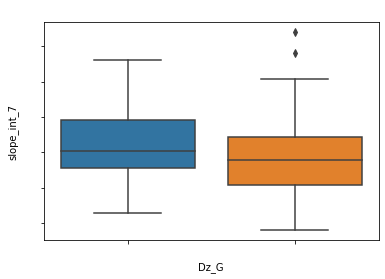

In [196]:
for i in range(8):
    sns.boxplot(x=mainfile['Dz_G'].astype(int), y=mainfile[f'slope_int_{i}'], data=mainfile)
    plt.tick_params(labelcolor = 'white')
    plt.title(i, color='white')
    plt.show()
    

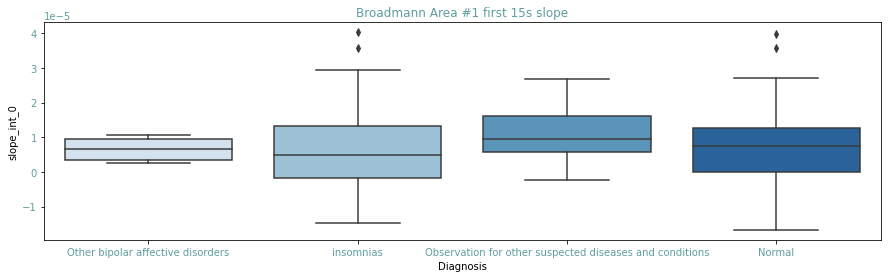

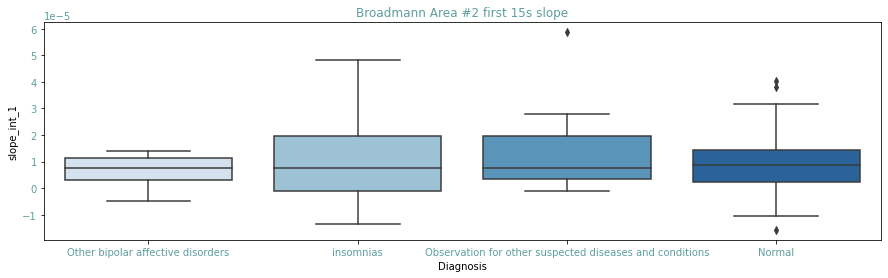

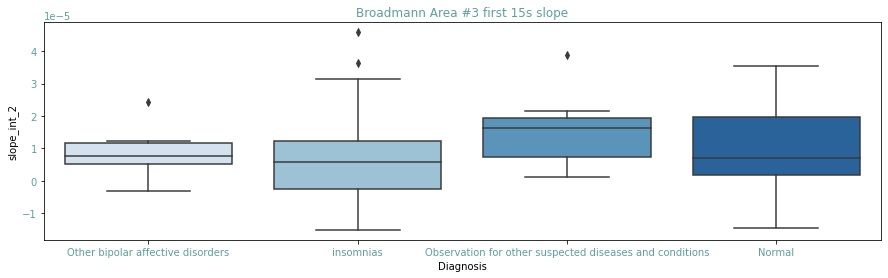

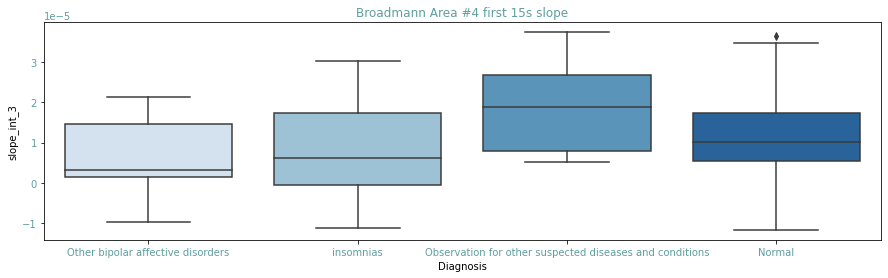

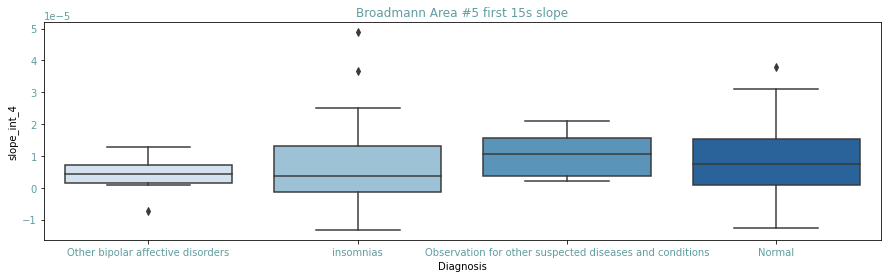

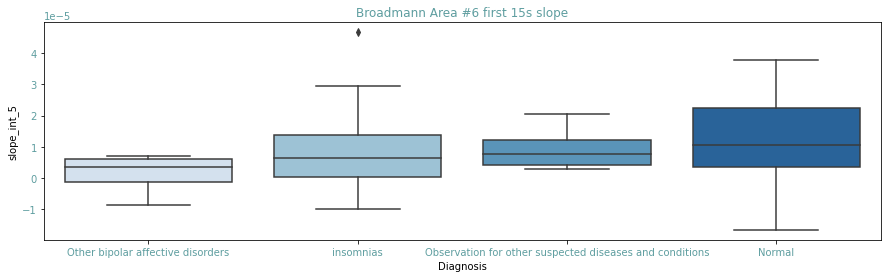

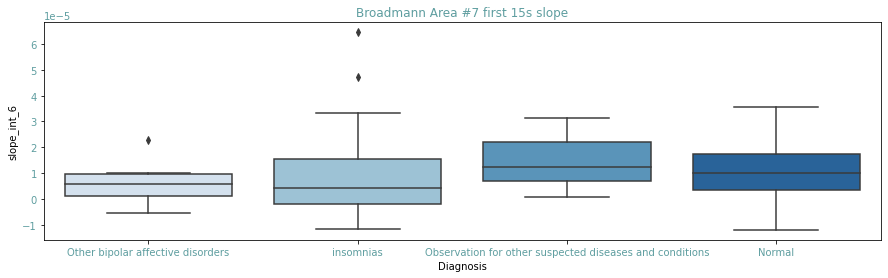

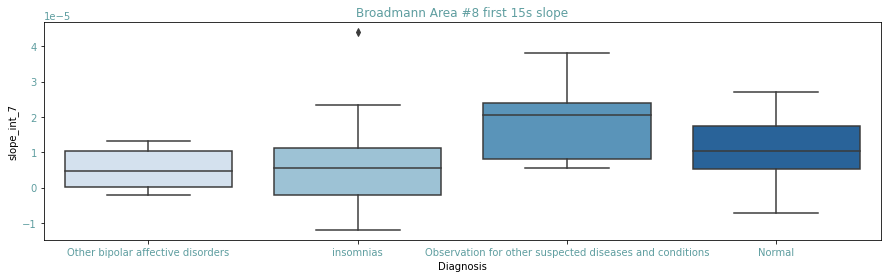

In [209]:
for i in range(8):
    plt.figure(figsize=(15,4))
    sns.boxplot(x=sample['Diagnosis'], y=sample[f'slope_int_{i}'], data=sample, palette="Blues")
    plt.tick_params(labelcolor = 'cadetblue')
    plt.title(f'Broadmann Area #{i+1} first 15s slope', color='cadetblue')
    plt.savefig(f'Broadmann Area #{i+1} first 15s slope.png')


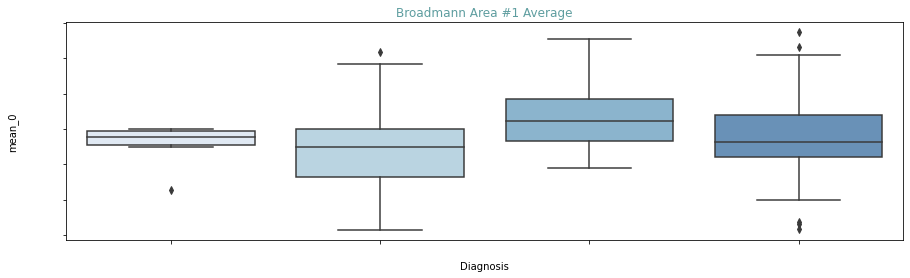

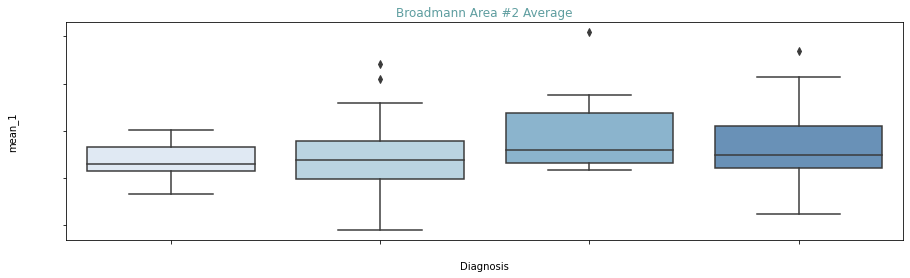

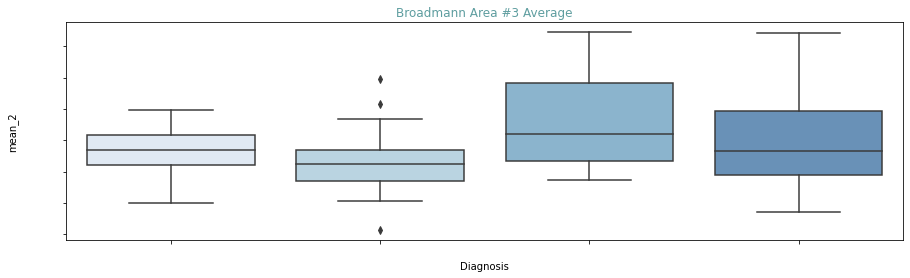

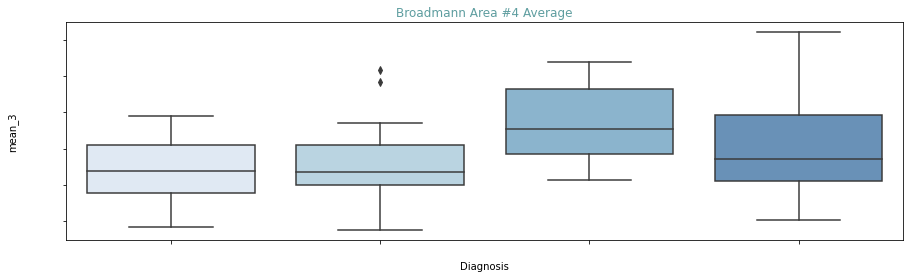

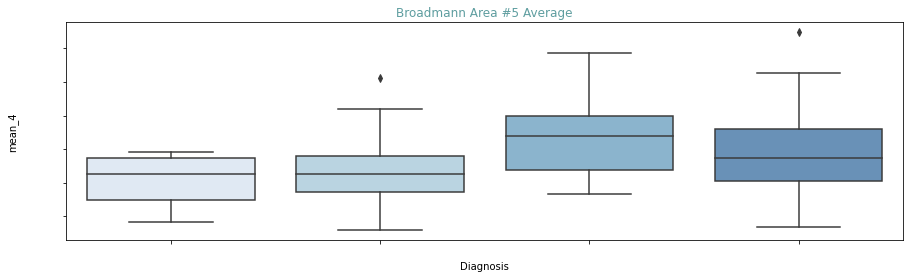

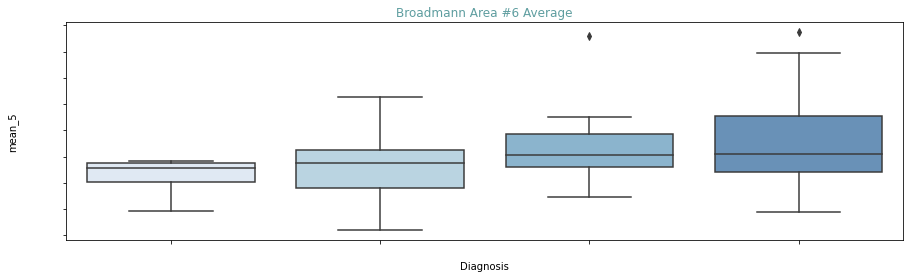

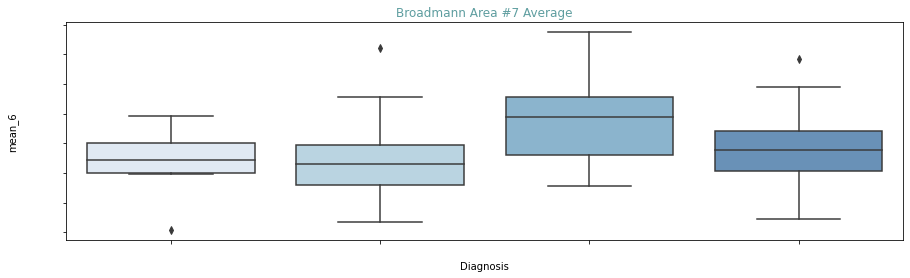

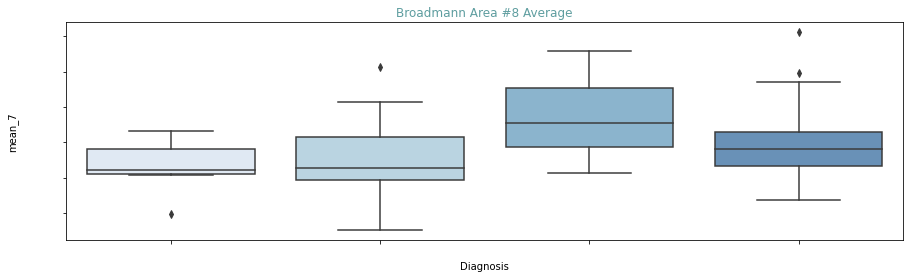

In [210]:
for i in range(8):
    plt.figure(figsize=(15,4))
    ax = sns.boxplot(x=sample['Diagnosis'], y=sample[f'mean_{i}'], data=sample, palette="Blues")
    for patch in ax.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .7))

    plt.tick_params(labelcolor = 'white')
    plt.title(f'Broadmann Area #{i+1} Average', color='cadetblue')
    plt.savefig(f'Broadmann Area #{i+1} Average.png')

In [212]:
sample.columns

Index(['Date', 'Hospital_\nNo', 'Name', 'Diagnosis', 'Dz_RE', 'Dz_G', 'Birth',
       'Sex', 'Age', 'No.ㄱ', 'No.ㅅ', 'No.ㅇ', '뇌파_검사_여부', '설문지_날짜', '비고',
       '거주지역', '학력', '직업', 'ARSR_ver_1.1', '_', '_.U', '_.V', '_.W', '_.X',
       '_.Y', 'K_AADHDS', 'IN', 'IN_개수_', 'HA', 'HA_개수_', 'PHQ_9',
       'State_Anxiety_\nin_STAI', 'Trait_Anxiety_\nin_STAI', 'GARS_scale',
       'BAI', 'BDI_II', 'SSI_BECK', '스마트폰_\n과의존_척도', 'AUDIT_K', 'conn_den_CB',
       'auc_CB', 'slope_CB', 'mean_CB', 'std_CB', 'slope_int_CB',
       'mean_int_CB', 'conn_den', 'auc', 'slope', 'mean', 'std', 'slope_int',
       'mean_int', 'slope_0', 'mean_0', 'std_0', 'slope_int_0', 'mean_int_0',
       'slope_1', 'mean_1', 'std_1', 'slope_int_1', 'mean_int_1', 'slope_2',
       'mean_2', 'std_2', 'slope_int_2', 'mean_int_2', 'slope_3', 'mean_3',
       'std_3', 'slope_int_3', 'mean_int_3', 'slope_4', 'mean_4', 'std_4',
       'slope_int_4', 'mean_int_4', 'slope_5', 'mean_5', 'std_5',
       'slope_int_5', 'mean_int_5',